# Project: Gapminder World Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Gapminder world contains diverse information about countries around the world
In this research I am interested in studying the communication evolution during the duration 2000 to 2017, as the evolution leap in communication technologies at this particular time

I will use the datasets for the percent of fixed-line-phone and cell-phone, and internet users in all world countries.
> **Communication** is chosen to be analyzed in this research
will focus on the following points:
- Study the **fixed line phones** usage during **2000 - 2017**
- Study the **cell phones** usage during **2000 - 2017**
- Study the **internet** usage during the duration **2000 - 2017**
- Study the **relation** between the number of **fixed line** phones users and the number of the **cell phones** users during the interval **2000 - 2017**

In [1]:
#import all neeeded libraries to perform analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
- Read the datasets
- Extract the needed dataset from the entire datasets, we need the data for the duration 2000 to 2017
- Handle the null values. (Delete the rows that have empty cells, as they are very limited, as the aom is to study the entire world behaviour not specific country)
- Merge the fixed line subscribers dataframe with cell phones to study the relation between them

### Read the datasets

In [2]:
df_cell_phone = pd.read_csv("cell_phones_per_100_people.csv")
df_fixed_line = pd.read_csv("fixed_line_subscribers_per_100_people.csv")
df_net_users = pd.read_csv("internet_users.csv")

Let's view the first few rows of each dataset to get an overview of each dataset and to show if there are needed wrangling techniques will show up

In [3]:
df_fixed_line.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.0856,NaN,NaN,NaN,NaN,0.0934,NaN,NaN,NaN,...,0.0181,0.057,0.0449,0.289,0.297,0.305,0.32,0.323,0.327,0.344
1,Albania,0.4180,NaN,NaN,NaN,NaN,0.7380,NaN,NaN,NaN,...,12.2000,11.300,11.6000,10.700,9.680,8.140,7.84,8.610,8.550,8.620
2,Algeria,NaN,NaN,NaN,NaN,NaN,0.5790,NaN,NaN,NaN,...,7.2900,8.120,8.3400,8.800,8.210,7.960,8.22,8.400,9.910,9.950
3,Andorra,NaN,NaN,NaN,NaN,NaN,2.7000,NaN,NaN,NaN,...,44.9000,45.200,45.9000,46.500,47.800,48.300,49.80,50.100,49.900,51.100
4,Angola,0.1220,NaN,NaN,NaN,NaN,0.1730,NaN,NaN,NaN,...,1.3500,1.200,0.6580,0.830,0.826,1.070,1.02,1.060,0.540,0.558


There are many null values at the sixties as the landline was not spread at that time globally

In [4]:
df_cell_phone.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,37.0,35.0,45.8,49.2,52.1,55.2,57.3,61.1,65.9,59.1
1,Albania,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,82.9,91.3,106.0,120.0,127.0,116.0,118.0,117.0,126.0,94.2
2,Algeria,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,92.6,91.1,97.1,100.0,104.0,111.0,109.0,116.0,111.0,112.0
3,Andorra,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,76.4,77.6,77.7,77.5,79.1,83.6,91.4,98.5,104.0,107.0
4,Angola,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,36.0,40.3,49.8,50.9,51.1,52.2,49.8,45.1,44.7,43.1


Cellphones were created very recently which explains the null values for the sixties till ninties

In [5]:
df_net_users.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.55,4.0,5.0,5.45,5.9,7.0,8.26,11.2,13.5,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,71.8,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,47.7,49.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,91.6,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.30,2.8,3.1,6.50,8.9,21.4,12.40,13.0,14.3,NaN


Internet was created very recently which explains the null values for the sixties till ninties

The heads of the three datasets showed that:
* There are data for years other than the needed interval. These years data shall be removed, by removing their related columns
* As the country shall be used as an index to refer to each country data in the selected interval, it shall be changed for all datasets to be the index
* We need to view the NaNs after croping unneeded data, to decide how to deal with them
* The values for the data is shown with the same format, we do not need to change thier format 

### Extract the needed dataset from the entire datasets, we need the data for the duration **2000 to 2017**

* This duration has been chosen to study a very close duration interval in communication. 
* And as the inventing of cellphones and Internet was availble only after ninties, we can afford more data without nulls in 2000's years as they spreaded perfectly in these years

In this step we will make the country the index of the dataframe to ease referring to the rows

In [6]:
# For the three dataset we will remove all columns but the country and the columns range from 2000 to 2017
# Keep the country and the columns 2000 till 2017 for df_fixed_line dataset
df_fixed_line =  pd.concat([df_fixed_line['country'] , df_fixed_line.loc[:, '2000':'2017']],axis = 1)
# Make the country column the index of df_fixed_line dataset
df_fixed_line = df_fixed_line.set_index('country')
# Keep the country and the columns 2000 till 2017 for df_cell_phone dataset
df_cell_phone =  pd.concat([df_cell_phone['country'] , df_cell_phone.loc[:, '2000':'2017']],axis = 1)
# Make the country column the index of df_cell_phone dataset
df_cell_phone = df_cell_phone.set_index('country')
# Keep the country and the columns 2000 till 2017 for df_net_users dataset
df_net_users =  pd.concat([df_net_users['country'] , df_net_users.loc[:, '2000':'2017']],axis = 1)
# Make the country column the index of df_net_users dataset
df_net_users = df_net_users.set_index('country')

### Handle the null values. (Delete the rows that have empty cells, as they are very limited, as the aim is to study the entire world behaviour not specific country)

#### df_fixed_line dataset

In [7]:
# Show the info of df_fixed_line to know if there are missing values in the chosen interval 2000-2017
df_fixed_line.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
2000    189 non-null float64
2001    189 non-null float64
2002    190 non-null float64
2003    190 non-null float64
2004    190 non-null float64
2005    189 non-null float64
2006    187 non-null float64
2007    189 non-null float64
2008    189 non-null float64
2009    191 non-null float64
2010    193 non-null float64
2011    192 non-null float64
2012    193 non-null float64
2013    192 non-null float64
2014    193 non-null float64
2015    192 non-null float64
2016    191 non-null float64
2017    189 non-null float64
dtypes: float64(18)
memory usage: 28.8+ KB


In [8]:
# Show the rows that have NaNs
df_fixed_line[df_fixed_line.isna().any(axis=1)]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,
Afghanistan,0.140,0.134,0.146,0.155,NaN,NaN,NaN,NaN,NaN,0.0181,0.0570,0.0449,0.28900,0.297,0.3050,0.3200,0.3230,0.3270
Brunei,24.200,26.000,23.400,23.200,23.100,23.000,21.700,21.2000,21.3000,21.0000,20.6000,20.3000,17.80000,NaN,17.5000,18.3000,17.7000,19.7000
Central African Republic,0.260,0.240,0.237,0.245,0.253,0.248,NaN,NaN,NaN,0.0821,0.0212,0.0184,0.01860,0.018,0.0179,0.0419,0.0433,0.0458
Liberia,0.235,0.230,0.228,NaN,NaN,NaN,NaN,0.0592,0.0554,0.0632,0.1490,0.2310,0.33200,0.259,0.2300,0.2010,0.1740,NaN
Marshall Islands,7.880,8.140,8.360,8.350,10.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.1300,NaN,NaN,NaN
Montenegro,NaN,NaN,NaN,NaN,NaN,27.700,27.200,28.5000,28.0000,27.6000,27.3000,27.3000,27.10000,27.000,26.3000,24.6000,23.6000,24.2000
Nauru,17.400,18.100,17.800,18.000,18.200,18.300,18.300,18.3000,18.2000,19.1000,0.0000,0.0000,0.00000,0.000,0.0000,NaN,NaN,NaN
Palau,NaN,NaN,35.300,37.200,39.000,40.300,37.500,39.0000,39.5000,39.0000,38.9000,39.0000,41.50000,41.300,40.4000,40.8000,NaN,NaN
Samoa,4.880,5.510,6.680,7.490,9.180,10.800,NaN,NaN,NaN,NaN,4.3000,NaN,4.37000,4.390,6.1300,5.9200,4.9800,4.3300


The aim of this research is to study having fixed line phones around the world, as we will still have 91.7% of the world countries would be representative for all other countries

In [9]:
#Remove rows with null values
df_fixed_line.dropna(how='any', axis=0, inplace=True)
#Ensure that the null values are removed
df_fixed_line.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, Albania to Zimbabwe
Data columns (total 18 columns):
2000    178 non-null float64
2001    178 non-null float64
2002    178 non-null float64
2003    178 non-null float64
2004    178 non-null float64
2005    178 non-null float64
2006    178 non-null float64
2007    178 non-null float64
2008    178 non-null float64
2009    178 non-null float64
2010    178 non-null float64
2011    178 non-null float64
2012    178 non-null float64
2013    178 non-null float64
2014    178 non-null float64
2015    178 non-null float64
2016    178 non-null float64
2017    178 non-null float64
dtypes: float64(18)
memory usage: 26.4+ KB


#### df_cell_phone dataset

In [10]:
# Show the info of df_cell_phone to know if there are missing values in the chosen interval 2000-2017
df_cell_phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
2000    189 non-null float64
2001    189 non-null float64
2002    189 non-null float64
2003    190 non-null float64
2004    191 non-null float64
2005    191 non-null float64
2006    189 non-null float64
2007    191 non-null float64
2008    189 non-null float64
2009    190 non-null float64
2010    193 non-null float64
2011    192 non-null float64
2012    193 non-null float64
2013    192 non-null float64
2014    192 non-null float64
2015    194 non-null float64
2016    192 non-null float64
2017    193 non-null float64
dtypes: float64(18)
memory usage: 28.8+ KB


In [11]:
# Show the rows that have NaNs
df_cell_phone[df_cell_phone.isna().any(axis=1)]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,
Guinea,0.511,0.661,1.0600,1.27,1.74,2.07,NaN,21.00,28.2,35.00,39.2,46.6,52.4,68.3,77.9,94.2,94.6,97.0
Marshall Islands,0.881,0.951,1.0500,1.12,1.18,1.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.1,27.0,NaN,27.6
"Micronesia, Fed. Sts.",0.000,0.000,0.0934,5.49,12.00,13.30,17.70,26.30,26.6,26.70,26.7,26.7,29.9,29.6,NaN,20.7,21.2,20.7
Montenegro,NaN,NaN,NaN,NaN,78.60,88.10,104.00,145.00,186.0,208.00,187.0,185.0,158.0,159.0,162.0,161.0,166.0,166.0
Nauru,11.600,14.700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,66.5,67.1,NaN,NaN,90.5,94.5,94.6
Palau,NaN,NaN,12.5000,19.80,19.80,30.60,42.70,55.80,62.4,69.70,80.8,87.0,97.2,102.0,108.0,134.0,NaN,NaN
Samoa,1.430,1.430,1.5300,5.92,8.96,13.40,25.20,47.20,NaN,NaN,48.4,NaN,53.0,52.4,55.4,62.3,77.6,63.6
Serbia,NaN,NaN,NaN,NaN,51.20,59.90,72.60,92.90,106.0,110.00,110.0,114.0,102.0,103.0,105.0,103.0,103.0,97.6
Sierra Leone,0.260,0.566,1.3500,2.18,NaN,NaN,NaN,13.00,16.4,18.50,31.2,32.6,32.9,58.3,67.8,78.9,85.7,88.5


* For some coutnries, they were parts of other countires before a specific date, as South Sudan.
  * South Sudan was a part of Sudan till 2010.
* In this research our aim is to study the having cell phones around the world, as we will still have 93% of the world countries would be representative for all other countries

In [12]:
#Remove rows with null values
df_cell_phone.dropna(how='any', axis=0, inplace=True)
#Ensure that the null values are removed
df_cell_phone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
2000    182 non-null float64
2001    182 non-null float64
2002    182 non-null float64
2003    182 non-null float64
2004    182 non-null float64
2005    182 non-null float64
2006    182 non-null float64
2007    182 non-null float64
2008    182 non-null float64
2009    182 non-null float64
2010    182 non-null float64
2011    182 non-null float64
2012    182 non-null float64
2013    182 non-null float64
2014    182 non-null float64
2015    182 non-null float64
2016    182 non-null float64
2017    182 non-null float64
dtypes: float64(18)
memory usage: 27.0+ KB


#### df_net_users dataset

In [13]:
# Show the info of df_net_users to know if there are missing values in the chosen interval 2000-2017
df_net_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, Afghanistan to Zimbabwe
Data columns (total 18 columns):
2000    184 non-null float64
2001    186 non-null float64
2002    187 non-null float64
2003    181 non-null float64
2004    184 non-null float64
2005    185 non-null float64
2006    184 non-null float64
2007    191 non-null float64
2008    190 non-null float64
2009    189 non-null float64
2010    189 non-null float64
2011    192 non-null float64
2012    189 non-null float64
2013    190 non-null float64
2014    190 non-null float64
2015    190 non-null float64
2016    190 non-null float64
2017    192 non-null float64
dtypes: float64(18)
memory usage: 28.8+ KB


In [14]:
# Show more details about the rows that have NaNs
df_net_users[df_net_users.isna().any(axis=1)]

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.00472,0.00456,0.0879,0.1060,1.2200,2.110,1.900,1.84,3.55,4.00,5.00,5.45,5.90,7.00,8.26,11.20,13.50
Andorra,10.5000,NaN,11.30000,13.5000,26.8000,37.6000,48.900,70.900,70.00,78.50,81.00,81.00,86.40,94.00,95.90,96.90,97.90,91.60
Australia,46.8000,52.70000,NaN,NaN,NaN,63.0000,66.000,69.500,71.70,74.30,76.00,79.50,79.00,83.50,84.00,84.60,86.50,86.50
Azerbaijan,0.1480,0.30600,5.00000,NaN,NaN,8.0300,12.000,14.500,17.10,27.40,46.00,50.00,54.20,73.00,75.00,77.00,78.20,79.00
Belarus,1.8600,4.30000,8.95000,NaN,NaN,NaN,16.200,19.700,23.00,27.40,31.80,39.60,46.90,54.20,59.00,62.20,71.10,74.40
Belize,5.9600,NaN,5.68000,NaN,9.8000,17.0000,24.000,24.600,26.30,27.20,28.20,30.70,31.00,33.60,38.70,41.60,44.60,47.10
Eritrea,0.1370,0.15800,0.22700,NaN,NaN,NaN,NaN,0.410,0.47,0.54,0.61,0.70,0.80,0.90,0.99,1.08,1.18,1.31
Guyana,6.6100,13.20000,NaN,NaN,NaN,NaN,NaN,13.800,18.20,23.90,29.90,30.00,30.50,31.00,32.00,34.00,35.70,37.30
Iraq,NaN,0.10000,0.50000,0.6000,0.9000,0.9000,0.952,0.930,1.00,1.06,2.50,5.00,7.10,9.20,13.20,58.00,21.20,49.40


It is noticed that North Korea row has zeros for the entire row, or NaN, as the internet is very restricted to the officials while the citizens are allowed to access only the local network

Will proceed in removing all the countries that have null values for the same mentioned reasons that our aim is to study intrent users globally 

In [15]:
#Remove rows with null values
df_net_users.dropna(how='any', axis=0, inplace=True)
#Ensure that the null values are removed
df_net_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Albania to Zimbabwe
Data columns (total 18 columns):
2000    167 non-null float64
2001    167 non-null float64
2002    167 non-null float64
2003    167 non-null float64
2004    167 non-null float64
2005    167 non-null float64
2006    167 non-null float64
2007    167 non-null float64
2008    167 non-null float64
2009    167 non-null float64
2010    167 non-null float64
2011    167 non-null float64
2012    167 non-null float64
2013    167 non-null float64
2014    167 non-null float64
2015    167 non-null float64
2016    167 non-null float64
2017    167 non-null float64
dtypes: float64(18)
memory usage: 24.8+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: The percentage of fixed line users globally

Let's view a simple description of ```df_fixed_line``` to have an overview of the fixed line phones around the world during the selected interval

In [16]:
df_fixed_line.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,19.953920,20.130734,20.218831,20.138825,20.116184,19.945266,19.822456,19.779702,19.788347,20.003864,19.653938,19.500479,19.003238,18.597315,18.018135,17.643936,17.200351,16.744628
std,21.539404,21.289378,21.227481,20.818229,20.447487,19.951775,19.563460,19.166201,18.977029,19.768812,19.389480,19.241837,18.855449,18.660616,18.600667,18.183759,17.564793,17.288308
min,0.020800,0.020600,0.020000,0.018900,0.019800,0.019300,0.017100,0.005990,0.061800,0.067800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.157500,2.415000,2.550000,2.902500,2.870000,2.952500,3.077500,3.057500,3.055000,3.087500,3.027500,3.147500,3.385000,3.202500,2.840000,2.442500,2.305000,2.255000
50%,10.600000,11.000000,11.450000,12.000000,12.850000,13.500000,13.750000,14.350000,14.900000,15.050000,14.950000,15.150000,15.000000,13.250000,13.200000,13.700000,13.700000,13.350000
75%,32.225000,31.850000,31.925000,31.625000,31.675000,31.250000,30.425000,30.125000,29.250000,29.725000,28.975000,29.825000,29.175000,28.675000,25.875000,24.650000,24.375000,23.600000
max,93.200000,91.300000,103.000000,101.000000,101.000000,100.000000,100.000000,101.000000,100.000000,123.000000,120.000000,124.000000,125.000000,127.000000,136.000000,130.000000,122.000000,122.000000


Generally we can tell that the number of having fixed-line phones decreased during the interval 2000-2017, ploting the mean of all countries will give us a clearer overview

As we will plot the same plot for the three dataset, the following function is written to plot the related line and bar graphs for any of the datasets

In [17]:
# Plot the line or bar chart with tailored ylabel and title based on the sent parameters.
# The default is to draw line charts as is used here more than bar charts
def plot_chart(ylabel, this_title, plotting_data, bar_chart=False):
    plt.xlabel('Years')
    plt.ylabel(ylabel)
    plt.title('The Change of Average '+ this_title + ' During 2000 - 2017')
    # Define the needed number of ticks for the x axis, for the selected interval it is 18 bins
    ind = np.arange(len(plotting_data.index))
    # Add the number of bins with their related labels (2000, 2001, 2002,..., 2017) to the x axis
    plt.xticks(ind, (plotting_data.index))
    if bar_chart:
        plotting_data.plot.bar(color='#1f77b4');
    else:
        plotting_data.plot(figsize = (15, 5));

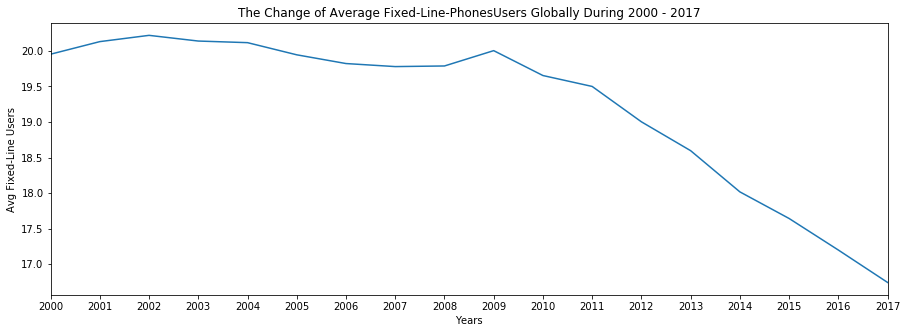

In [18]:
plot_chart('Avg Fixed-Line Users', 'Fixed-Line-PhonesUsers Globally', df_fixed_line.mean())

During the studied duration the usage of fixed-line phones decreased globally
It can be noticed that linear decrease in fixed line holders happened after 2009

Let's check Egypt, United States and Canada countries change in the number of fixed-line-phone users:

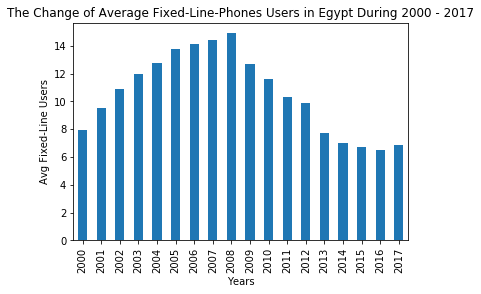

In [19]:
plot_chart('Avg Fixed-Line Users', 'Fixed-Line-Phones Users in Egypt', df_fixed_line.loc['Egypt'], bar_chart = True)

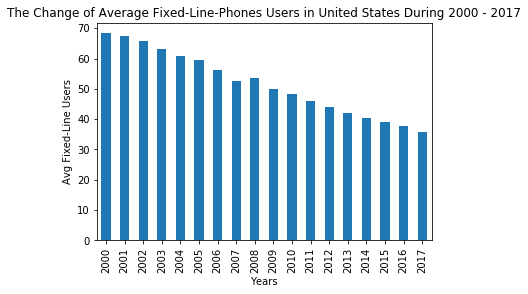

In [20]:
plot_chart('Avg Fixed-Line Users', 'Fixed-Line-Phones Users in United States', df_fixed_line.loc['United States'], bar_chart = True)

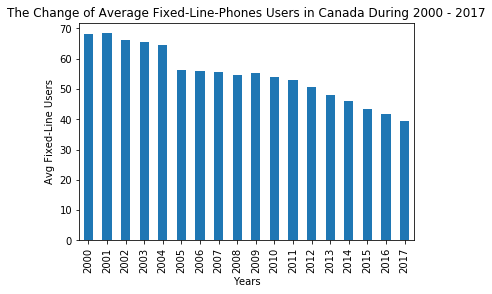

In [21]:
plot_chart('Avg Fixed-Line Users', 'Fixed-Line-Phones Users in Canada', df_fixed_line.loc['Canada'], bar_chart = True)

* The above charts show similar behaviour, that they all have a decrease in fixed-line usage across the countries Egypt, United States and Canada
* However, each one of them decreased differently
  * **Egypt**: got an increase in fixed-line usage during the duration 2000 to 2008, then the number of users decreased exponentially after 2008. And the number of users did not exceed 16%
  * **United States**: Shows that 70% of its population were using the fixed lines. It was decreasing lineary reached to 40% in 2017
  * **Canada**: The users of fixed-line in Canadas were approximatly 70%, and decreased suddenly to 55% in 2005. Remained in this percent till 2011 then it started decaying lineary, reached to 40% in 2017

### Research Question 2: The percentage of cell phone users globally

Let's view a simple description of ```df_cell_phone``` to have an overview of the cell-phone usage around the world during the selected interval

In [22]:
df_cell_phone.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.00000,182.000000
mean,15.664243,20.605828,24.802069,30.202436,36.052478,43.768176,53.010527,63.500637,72.924044,80.650456,88.003297,94.108901,98.375220,101.787967,103.680769,105.673077,106.13956,106.573077
std,22.136402,26.145133,28.679241,31.240410,33.337076,36.189680,38.814358,40.862251,41.515976,41.078768,40.558092,39.563856,38.839482,38.342983,36.875540,36.014940,36.24140,35.514782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284000,1.170000,2.440000,6.850000,9.710000,11.200000,12.900000,14.20000,15.000000
25%,0.428750,0.920500,1.935000,3.387500,5.940000,8.892500,17.225000,24.450000,34.100000,47.300000,58.200000,69.575000,70.075000,73.725000,75.025000,80.275000,83.20000,85.450000
50%,4.590000,8.080000,11.450000,18.300000,25.050000,36.350000,50.050000,62.900000,74.550000,87.050000,92.300000,100.350000,106.000000,107.000000,107.000000,109.000000,110.00000,110.500000
75%,22.425000,30.950000,39.750000,54.625000,62.550000,74.375000,82.750000,97.450000,105.750000,110.750000,116.000000,120.500000,123.750000,125.750000,129.000000,130.000000,128.00000,129.000000
max,76.600000,92.900000,107.000000,120.000000,113.000000,130.000000,153.000000,153.000000,160.000000,169.000000,191.000000,197.000000,182.000000,182.000000,206.000000,200.000000,213.00000,209.000000


Q1 indicates that lower number of the users around the world reached to 85.45% in 2017, which shows the wide spread of phones around the world

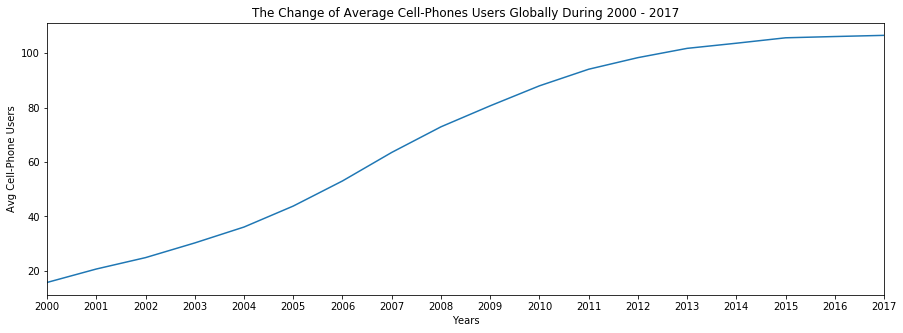

In [23]:
plot_chart('Avg Cell-Phone Users', 'Cell-Phones Users Globally', df_cell_phone.mean())

From this graph we can see that the percentage of having cell phones has increased from 15% to 110%, which indicates that all worlds' population have at least one cell phone, and some of them has two or more

Let's check Canada, United States and Egypt countries change in the number of cell-phone users:

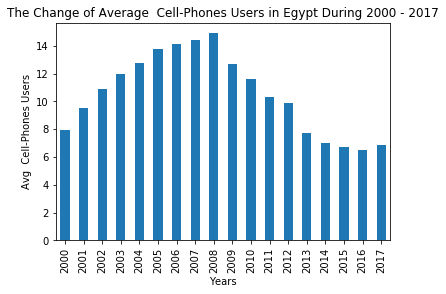

In [24]:
plot_chart('Avg  Cell-Phones Users', ' Cell-Phones Users in Egypt', df_fixed_line.loc['Egypt'], bar_chart = True)

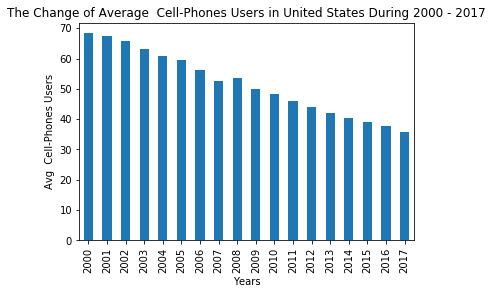

In [25]:
plot_chart('Avg  Cell-Phones Users', ' Cell-Phones Users in United States', df_fixed_line.loc['United States'], bar_chart = True)

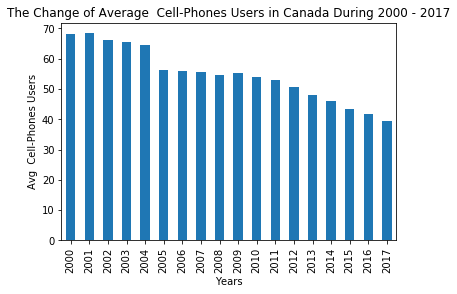

In [26]:
plot_chart('Avg  Cell-Phones Users', ' Cell-Phones Users in Canada', df_fixed_line.loc['Canada'], bar_chart = True)

Studying the change of Egypt, United States and Canada  all show an impressive increase in the percentage of cell-phone users durig 2000 - 2017
- **Egypt**: The usage of cell-phones in Egypt increased exponentially from 2000 (approximatly 0 users) to 2012 (approximatly 113%). Then aprroximatly 10% of the users abonded their second device. After 2015 the percent started increasing lineary untill 2017
- **United States**:  The usage of cell-phones in United states increased lineary from 2000 (approximatly 40% users) to 2013 (approximatly 100%). Then suddenly 10% of the users got their second device, and their percent increases lineary
- **Canada**:  The usage of cell-phones in Canada increased lineary from 2000 (approximatly 30% users) to 2013 (approximatly 80%). Then, the increase started to be slower, and remained with the same slow slope till 2017


### Research Question 3: The percentage of Internet users globally

Let's view a simple description of ```df_net_users``` to have an overview of the Internet usage around the world during the selected interval

In [27]:
df_net_users.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,8.012891,10.048140,13.366136,15.686285,18.044476,20.051964,22.348341,25.067180,27.767006,30.530000,33.763832,36.695569,39.571677,42.385509,45.432754,47.901976,50.997186,55.034611
std,12.925621,15.119349,18.683297,20.472809,22.053525,23.217105,24.318869,25.428419,26.373101,27.069817,27.580774,27.993375,28.512657,28.759817,28.456613,28.288138,28.322489,27.738526
min,0.005900,0.011500,0.055500,0.064600,0.077500,0.215000,0.228000,0.240000,0.250000,0.260000,0.580000,0.900000,1.050000,1.150000,1.250000,2.480000,3.760000,2.660000
25%,0.401000,0.633000,1.080000,1.670000,2.250000,2.905000,3.650000,4.250000,5.675000,6.710000,8.185000,10.350000,12.750000,15.050000,18.850000,21.150000,24.600000,30.800000
50%,2.110000,2.850000,4.330000,6.200000,7.640000,9.740000,12.300000,16.000000,20.800000,24.300000,28.300000,34.000000,36.800000,41.000000,44.900000,48.900000,53.200000,59.100000
75%,7.505000,11.700000,18.050000,22.600000,27.350000,32.000000,35.150000,40.550000,44.250000,50.200000,53.500000,57.350000,62.100000,66.000000,69.050000,71.550000,76.000000,78.800000
max,52.000000,64.000000,79.100000,83.100000,83.900000,87.000000,89.500000,90.600000,91.000000,93.000000,93.400000,94.800000,96.200000,96.500000,98.200000,98.200000,98.200000,100.000000


The desciption shows that there is an increase in Interenet usage around the world.
If we looked mainly on max, we can see that the maximum usage in 2000 reached to 50% of a country reached to 100% in 2017

Plotting the mean of Internet users will show clearer view about the Internet usage around the world

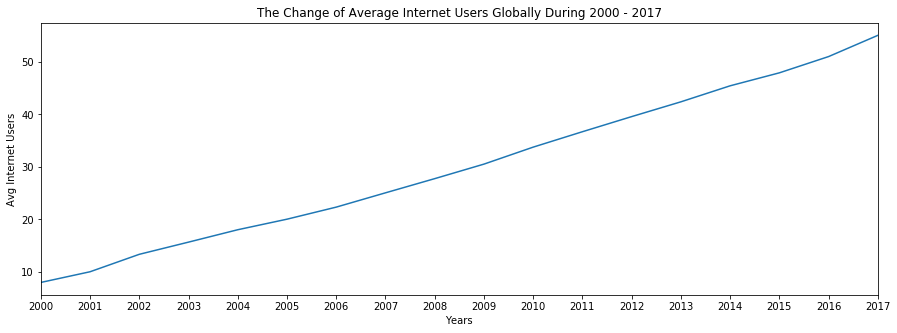

In [28]:
plot_chart('Avg Internet Users', 'Internet Users Globally', df_net_users.mean())

From this graph we can see that the percentage of using internet has increased from 8% to more than 50%, and the increase happened linearly

Let's check Egypt, United States and Canada countries change in the number of Internet users:

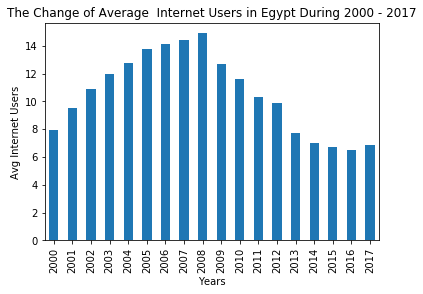

In [29]:
plot_chart('Avg Internet Users', ' Internet Users in Egypt', df_fixed_line.loc['Egypt'], bar_chart = True)

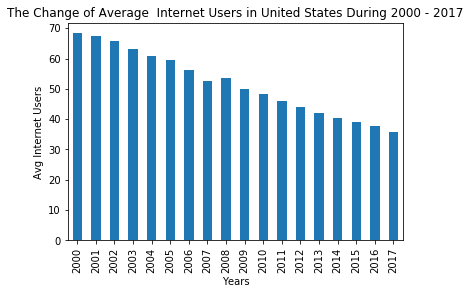

In [30]:
plot_chart('Avg Internet Users', ' Internet Users in United States', df_fixed_line.loc['United States'], bar_chart = True)

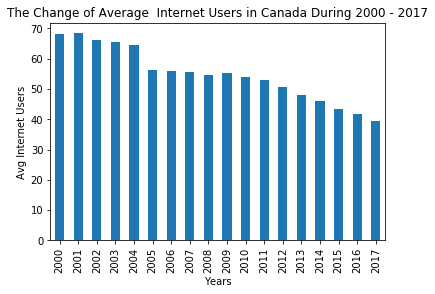

In [31]:
plot_chart('Avg Internet Users', ' Internet Users in Canada', df_fixed_line.loc['Canada'], bar_chart = True)

Studying the change of Egypt, United States and Canada  all show an impressive increase in the percentage of internet users durig 2000 - 2017
- **Egypt**: The usage of internet in Egypt increased lineary from 2000 (approximatly 0 users) to 2004 (approximatly 4%). Then suddenly more 6% users started using Internet. Since 2004 the increase of Internet users in Egypt increased exponentially reached to 45% in 2017
- **United States**:  The percent of Internet users was increasing exponentially since 2000 (40%) till 2007 (75%). The duration from 2007 to 2015 was having stable increase and decrease Internet users.After that the increase got back to exponential increase till 2017, reached to 87.3%
- **Canada**:  The behaviour of Internt users increase in Canada was the same linear increase during the interval 2000 - 2017

### Research Question 4: Relation Between the number of cell phone users and the number of fixed lines users

We can see the relation between the two datasets by plotting the means of the the tow datasets on one chart as below:

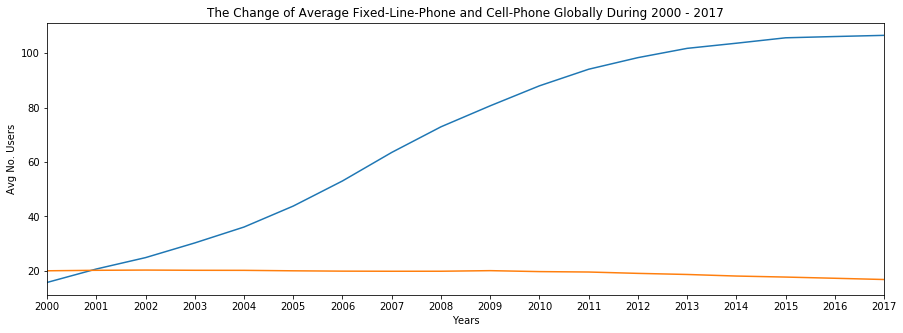

In [32]:
# Draw the mean of the df_cell_phone, then add df_fixed_line above it to see if there is relation between them
plot_chart('Avg No. Users', 'Fixed-Line-Phone and Cell-Phone Globally', df_cell_phone.mean())
df_fixed_line.mean().plot();

* From the graph it can be seen, that the usage of fixed-line phones was very limited by 2000, 20% of the entire world population were having fixed lines
* However cell-phones were used by 15% in 2000, and in 2017 each person has a phone or more. As the percent 110% indicates that 10% are having two cell-phones at least
* The decay in using fixed-line phones happened linery while the increase of cell-phones happened exponentially and affected the usage of fixed-line phones
  * As indicated before in 2009 the fixed-line-phone users decreased rapidly, which was the time of smartphones invention

<a id='conclusions'></a>
## Conclusions

* Generally the number of fixed-line users decreased lineary during [2000-2017]
* The number of cell-phones increased exponentially during [2000 - 2017]
* Internet Users increased lineary during the duration [2000 - 2017]
* Amongst the studied communication tools, there is no spread any tool as cell-phones which reached to 100% in 2013 around the world
* There are some information for countries are important to be noticed as:
  * North Korea that still could access global Internet 
  * And South Sudan that was part of another country during the studied duration [2000 - 2010]
* Fixed-line phones have a huge decrease in the number of users in 2009, as the cell-phones reached to 80% of population around the world during that year
* As the aim of this research is studying the global behaviour in communication tools I did not face any problem with the gathered data

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0